## **Research Question 3: Do Video Game Series Get Worse**

## **Datasets**
* series_comparison.csv - Dataset we made in 600-RQ3.ipynb
* series.csv - Dataset we made in 600-RQ3.ipynb
* series_outcome.csv - Dataset we made in 700-RQ3.ipynb

In [36]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import *
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.lines as mlines

In [37]:
sns.set_context("talk", font_scale=1.4)

In [77]:
df1=pd.read_csv('../data/analysis/series_comparison.csv')
df2= pd.read_csv('../data/analysis/series.csv')
df3=pd.read_csv('../data/analysis/series_outcome.csv')

In [40]:
df1.describe()

,Global Sales,Critic Rating,Releases
count,2.000000e+00,2.000000,2.000000
mean,2.098290e+09,255173.500000,3687.000000
std,1.021826e+09,4557.303205,161.220346
min,1.375750e+09,251951.000000,3573.000000
25%,1.737020e+09,253562.250000,3630.000000
50%,2.098290e+09,255173.500000,3687.000000
75%,2.459560e+09,256784.750000,3744.000000
max,2.820830e+09,258396.000000,3801.000000


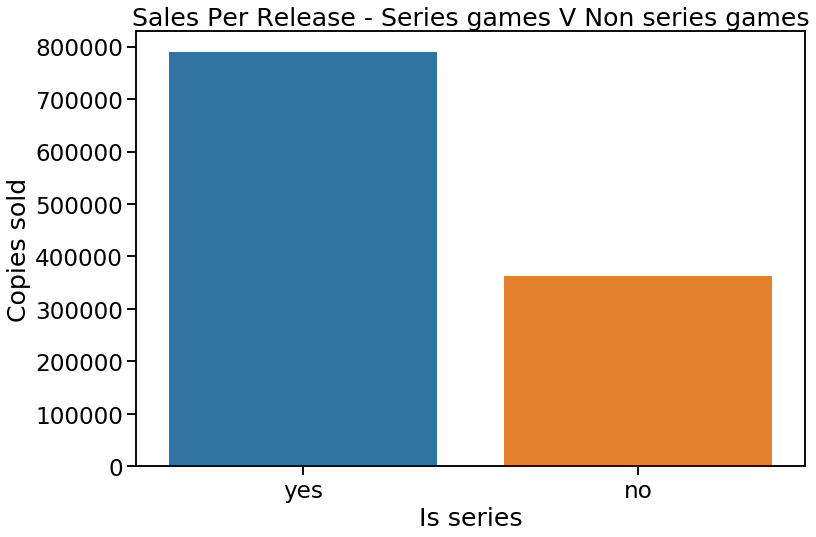

In [41]:
data = pd.DataFrame(df1['Global Sales'] / df1['Releases'])
data.columns = ['Sales Per Release']
series = df1.is_series

plt.figure(figsize=(12,8))
ax = sns.barplot(x = series , y = 'Sales Per Release', data=data)
ax.set_ylabel(ylabel='Copies sold')
ax.set_xlabel(xlabel='Is series')
ax.set_title(label='Sales Per Release - Series games V Non series games')
ax.set_xticklabels(labels = series)
plt.show()

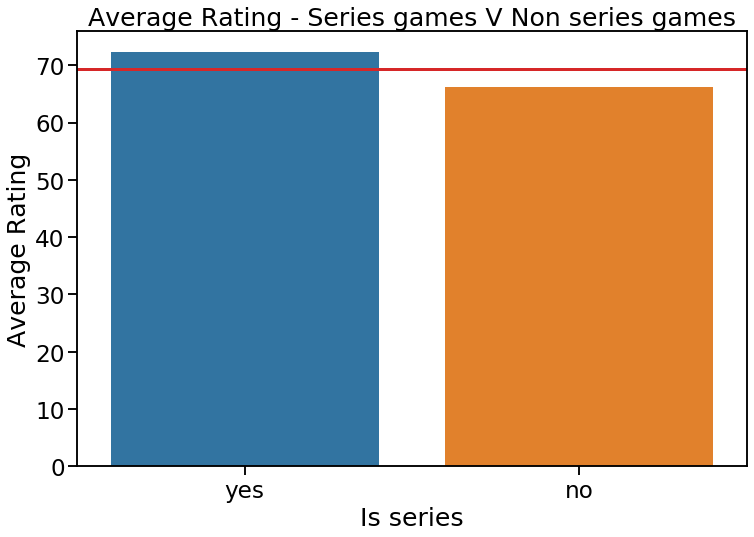

,Rating Per Release
0,72.319060
1,66.285451


In [42]:
data = pd.DataFrame(df1['Critic Rating'] / df1['Releases'])
data.columns = ['Rating Per Release']
data = pd.DataFrame(data.sort_values(by = 'Rating Per Release' ,ascending=False))
series = df1.is_series

#colors = sns.color_palette("summer", len(rel))
plt.figure(figsize=(12,8))
ax = sns.barplot(x = series  , y = 'Rating Per Release', data=data)
ax.set_ylabel(ylabel='Average Rating')
ax.set_xlabel(xlabel='Is series')
ax.set_title(label='Average Rating - Series games V Non series games')
ax.set_xticklabels(labels = series)

mean=data['Rating Per Release'].mean()
ax.axhline(mean,color='tab:red',linewidth=3)


plt.show();
data.head()

In [43]:
df2.describe()

,Global Sales,Critic Rating,Releases,Length,Time Per Release,Average Rating,Sales Per Release
count,6.400000e+01,64.00000,64.000000,64.000000,64.000000,64.000000,6.400000e+01
mean,2.509125e+07,808.23125,11.078125,11.593750,1.421875,73.456077,2.032408e+06
std,3.604437e+07,654.38773,9.130978,4.766679,0.792919,8.091980,2.162610e+06
min,3.600000e+05,150.00000,2.000000,3.000000,0.000000,50.666667,1.800000e+05
25%,3.602500e+06,346.42500,5.000000,7.750000,1.000000,68.776471,5.709659e+05
50%,1.141000e+07,551.85000,8.000000,12.000000,1.000000,73.946667,1.357366e+06
75%,2.963250e+07,996.70000,13.000000,15.250000,2.000000,77.466842,2.698750e+06
max,1.707300e+08,2934.90000,41.000000,22.000000,4.000000,90.250000,1.187667e+07


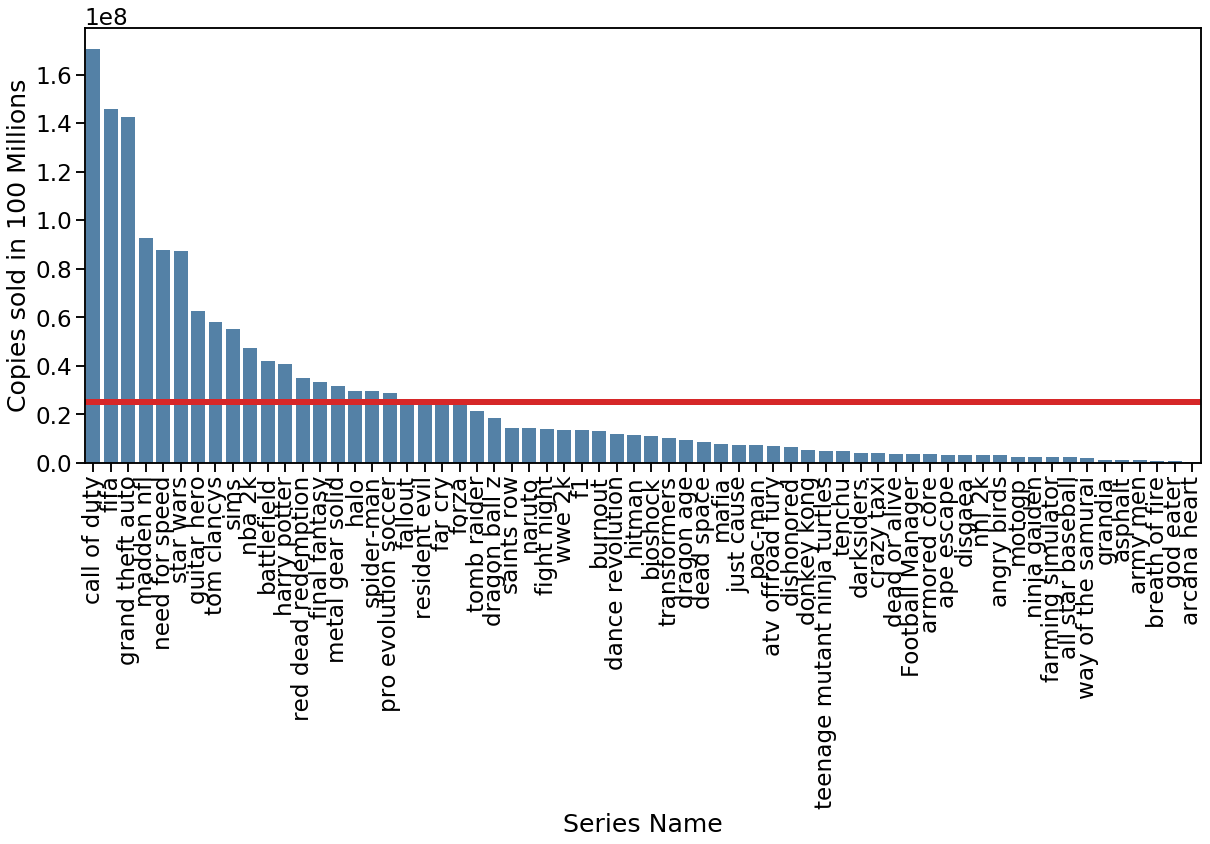

In [44]:
data = pd.DataFrame(df2.sort_values(by='Global Sales',ascending=False))
series = data.series_name

plt.figure(figsize=(20,8))
ax = sns.barplot(y ='Global Sales' , x = series, data=data,color='steelblue')
ax.set_ylabel(ylabel='Copies sold in 100 Millions')
ax.set_xlabel(xlabel='Series Name')
#ax.set_title(label='Top 10 Total Publisher by copies sold', fontsize=20)
ax.set_xticklabels(labels =series,rotation=90)
mean=data['Global Sales'].mean()
ax.axhline(mean,color='tab:red',linewidth=6)

plt.show();

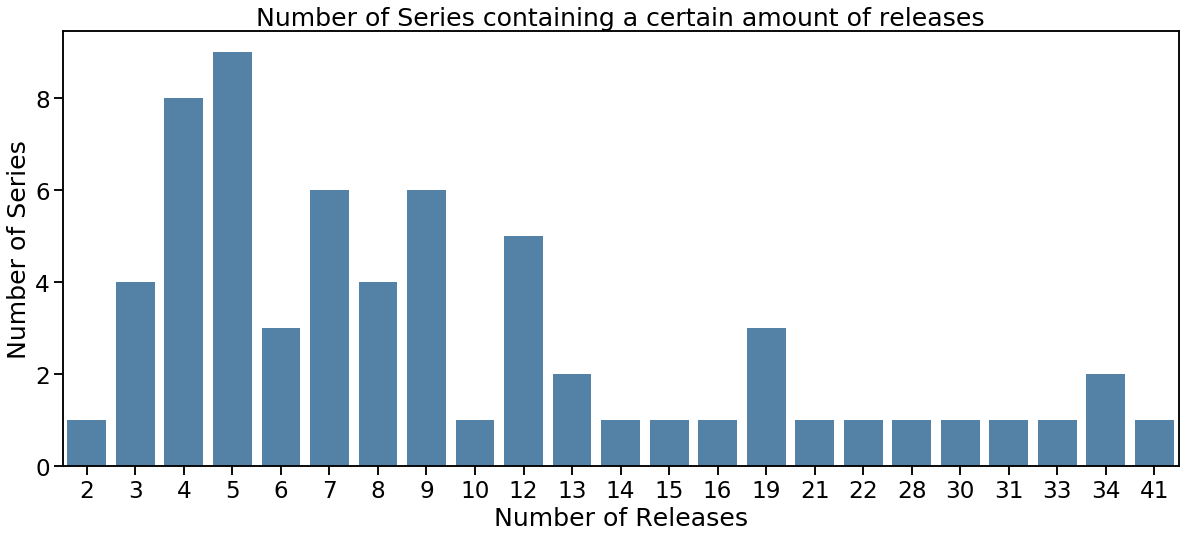

In [45]:
data = df2.groupby(['Releases']).count()['Critic Rating']
data = pd.DataFrame(data)
data.columns = ['Amount']

plt.figure(figsize=(20,8))
ax = sns.barplot(x = data.index  , y = 'Amount', data=data,color='steelblue')
ax.set_ylabel(ylabel='Number of Series')
ax.set_xlabel(xlabel='Number of Releases')
ax.set_title(label='Number of Series containing a certain amount of releases')
ax.set_xticklabels(labels = data.index)
plt.show()

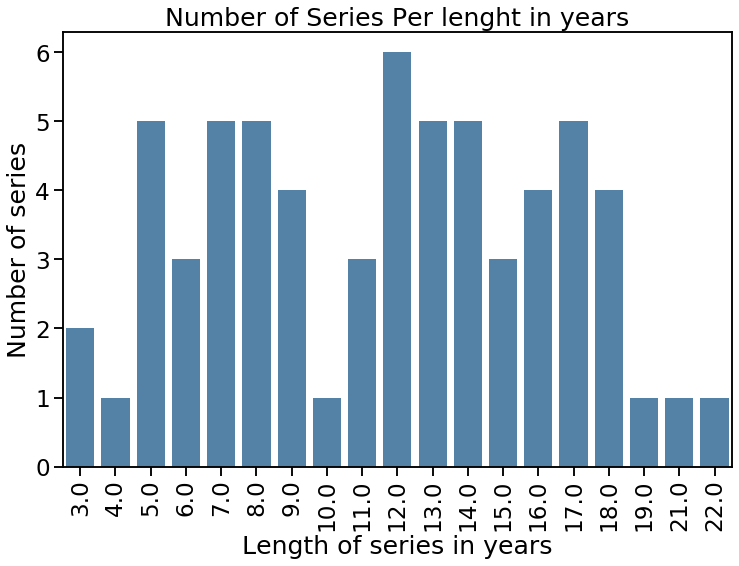

,Amount
Length,
3.0,2
4.0,1
5.0,5
6.0,3
7.0,5


In [46]:
data = df2.groupby(['Length']).count()['Releases']
data = pd.DataFrame(data)
data.columns = ['Amount']

plt.figure(figsize=(12,8))
ax = sns.barplot(x = data.index  , y = 'Amount', data=data,color='steelblue')
ax.set_ylabel(ylabel='Number of series')
ax.set_xlabel(xlabel='Length of series in years')
ax.set_title(label='Number of Series Per lenght in years')
ax.set_xticklabels(labels = data.index,rotation=90)
plt.show()
data.head()

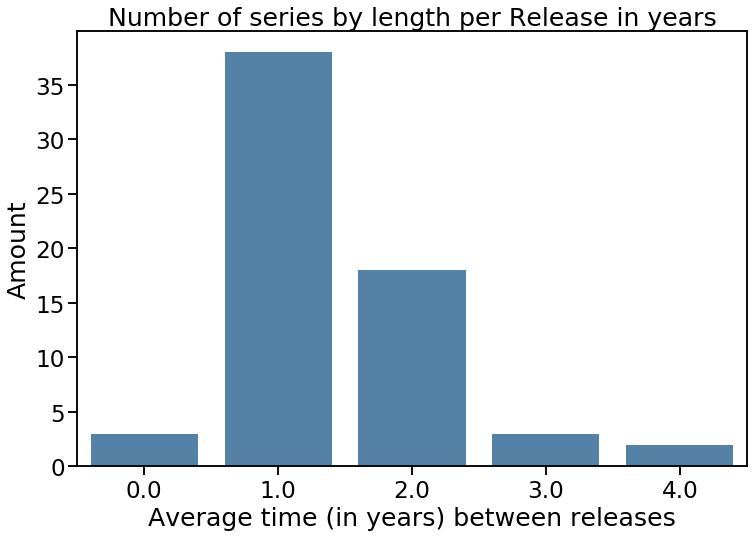

,Amount
Time Per Release,
0.0,3
1.0,38
2.0,18
3.0,3
4.0,2


In [47]:
data = df2.groupby(['Time Per Release']).count()['Global Sales']
data = pd.DataFrame(data)
data.columns = ['Amount']


plt.figure(figsize=(12,8))
ax = sns.barplot(x = data.index , y = 'Amount', data=data,color='steelblue')
ax.set_ylabel(ylabel='Amount')
ax.set_xlabel(xlabel='Average time (in years) between releases')
ax.set_title(label='Number of series by length per Release in years')
ax.set_xticklabels(labels = data.index)
plt.show()
data.head()

C:\Users\Sean Harkin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


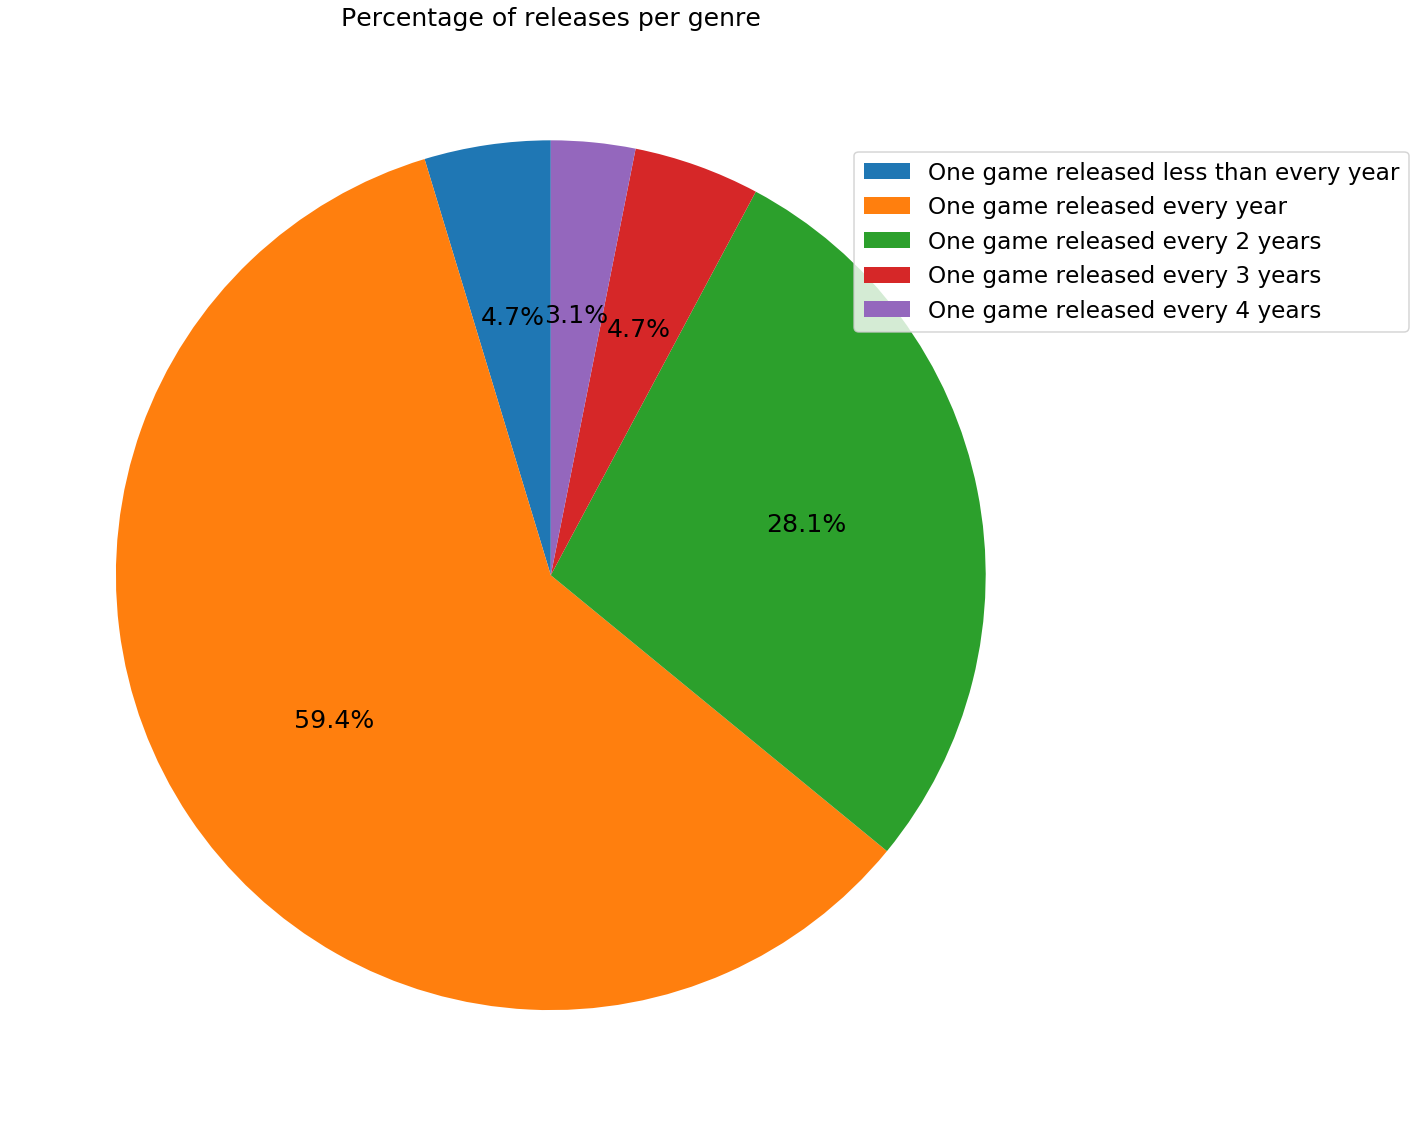

In [48]:
data = df2.groupby(['Time Per Release']).count()['Global Sales']
data = pd.DataFrame(data)
data.columns = ['Amount']
labels=['One game released less than every year','One game released every year','One game released every 2 years','One game released every 3 years','One game released every 4 years']

explode= [0.02, 0.02, 0.02, 0.02, 0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02]
#colors=['red','green','brown','purple','orange','yellow','pink','blue','grey','darkred','cyan','darkblue','palegreen']
fig,ax = plt.subplots(figsize=(20,20))
ax.pie(data, autopct="%.1f%%", startangle=90)

ax.set_title("Percentage of releases per genre")
plt.legend(labels, loc='best', bbox_to_anchor=(0.6, 0.4, 0.7, 0.5))

In [82]:
df3

,Unnamed: 0,Outcome,Overall Sales,Long Sales,Short Sales,Overall Ratings,Long Ratings,Short Ratings
0,0,Better,23,20,3,15,12,3
1,1,Worse,41,33,8,49,41,8


C:\Users\Sean Harkin\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
C:\Users\Sean Harkin\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
C:\Users\Sean Harkin\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
C:\Users\Sean Harkin\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
C:\U

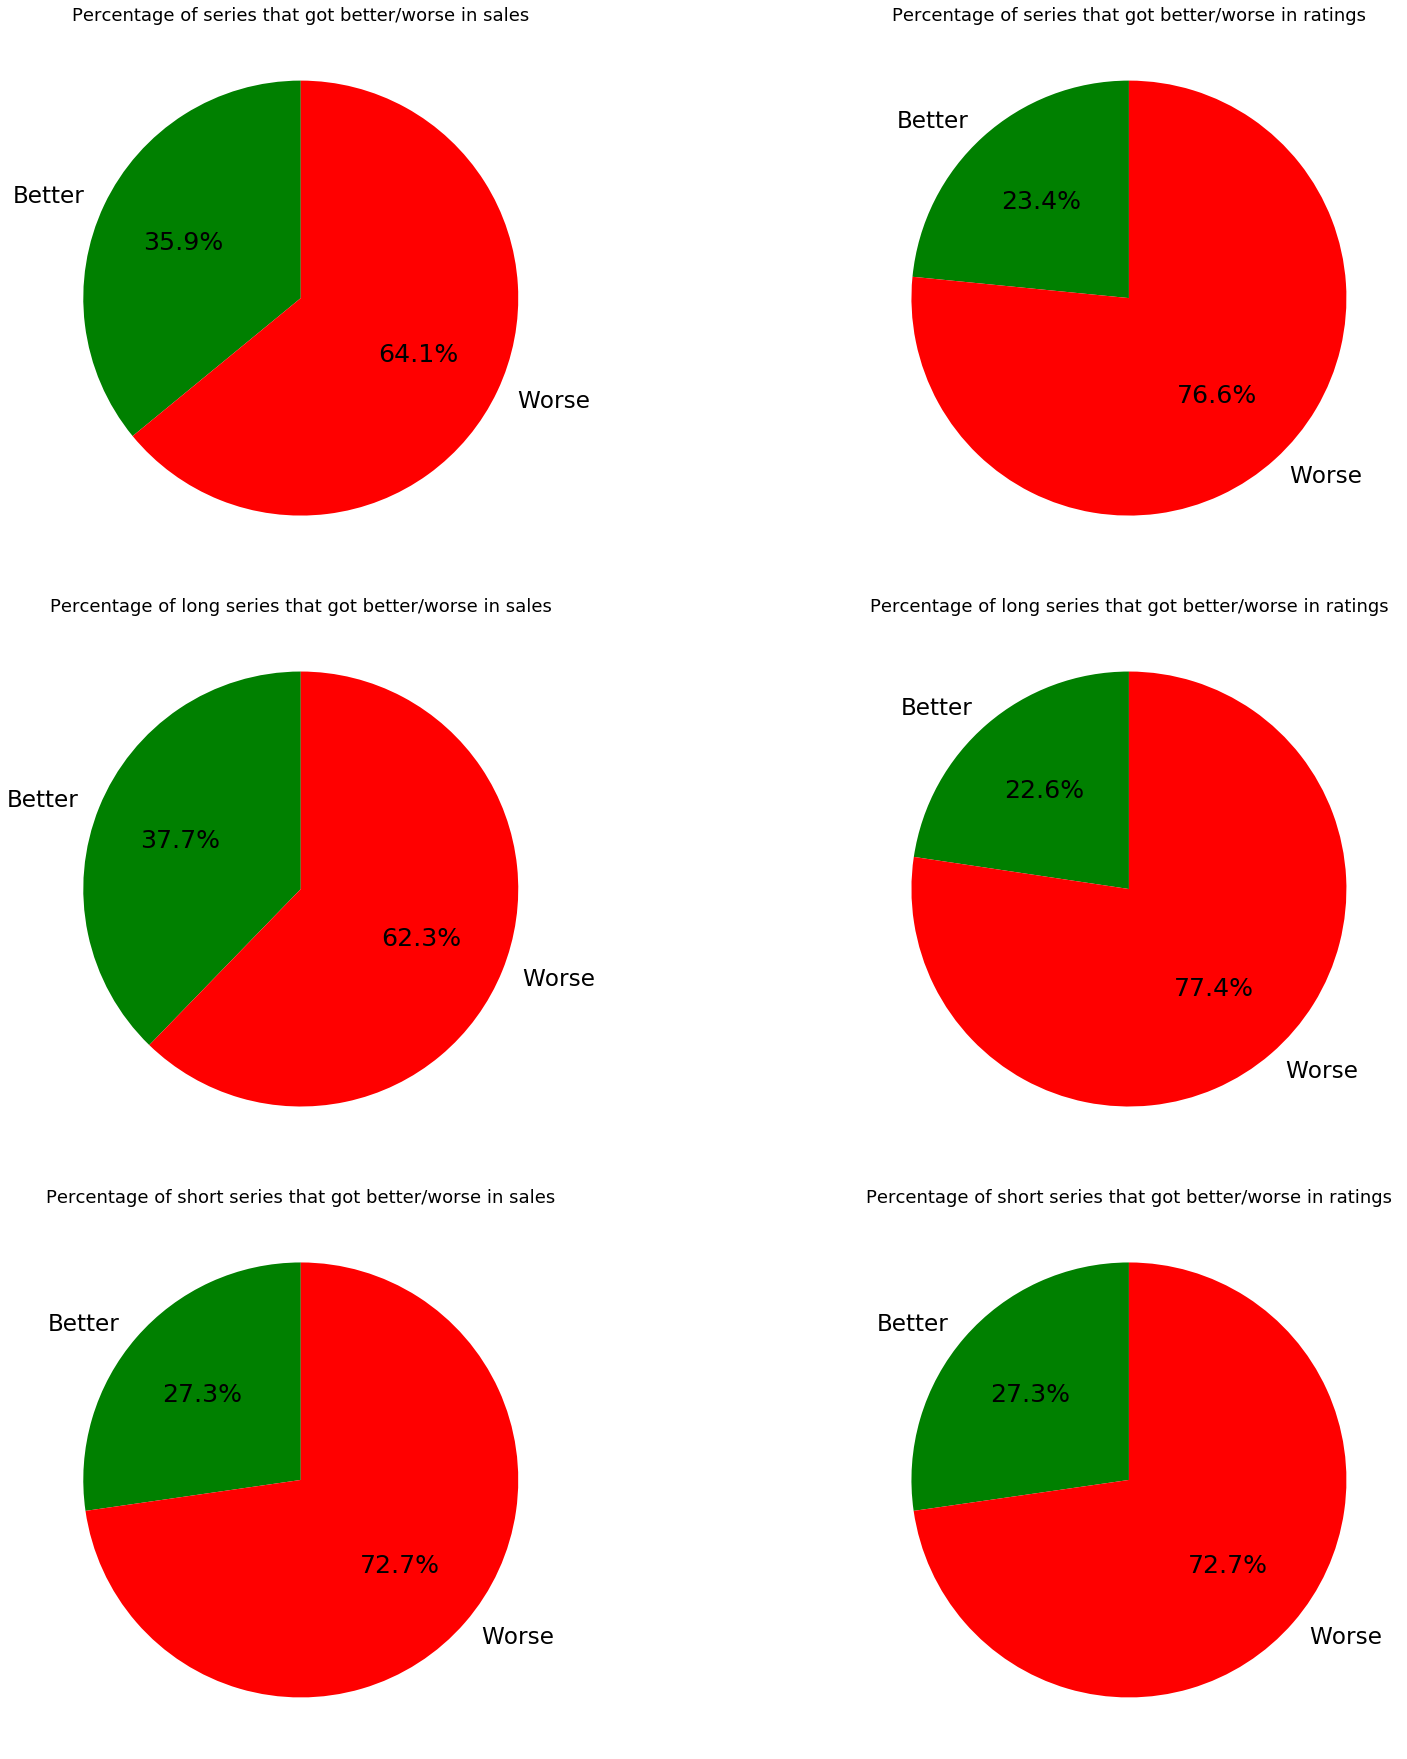

In [81]:
data = df3['Overall Sales']
data = pd.DataFrame(data)

data1 = df3['Overall Ratings']
data1 = pd.DataFrame(data1)

data2 = df3['Long Sales']
data2 = pd.DataFrame(data2)

data3 = df3['Long Ratings']
data3 = pd.DataFrame(data3)

data4 = df3['Short Sales']
data4 = pd.DataFrame(data4)

data5 = df3['Short Ratings']
data5 = pd.DataFrame(data5)

labels=['Better','Worse']
colors = ['green','red']

plt.figure(figsize=(25,25))
plt.subplot(321)
plt.pie(data, autopct="%.1f%%", startangle=90,colors=colors,labels=labels)
plt.title('Percentage of series that got better/worse in sales',fontsize=18)

plt.subplot(322)
plt.pie(data1, autopct="%.1f%%", startangle=90,colors=colors,labels=labels)
plt.title('Percentage of series that got better/worse in ratings',fontsize=18)

plt.subplot(323)
plt.pie(data2, autopct="%.1f%%", startangle=90,colors=colors,labels=labels)
plt.title('Percentage of long series that got better/worse in sales',fontsize=18)

plt.subplot(324)
plt.pie(data3, autopct="%.1f%%", startangle=90,colors=colors,labels=labels)
plt.title('Percentage of long series that got better/worse in ratings',fontsize=18)

plt.subplot(325)
plt.pie(data4, autopct="%.1f%%", startangle=90,colors=colors,labels=labels)
plt.title('Percentage of short series that got better/worse in sales',fontsize=18)

plt.subplot(326)
plt.pie(data5, autopct="%.1f%%", startangle=90,colors=colors,labels=labels)
plt.title('Percentage of short series that got better/worse in ratings',fontsize=18)

plt.tight_layout()
plt.show()

## **Conclusion**
* Games that are part of a series tend to do better than games that arent part of a series in terms of rating and sales. This is more than likely because games that do well get turned into series as a result.
* Developers generally release the next instalment of the series on a yearly basis.
* In genreal, series get worse in both sales and ratings. The length the series has been running for (in years) doesnt seem to effect this at all.